# Segmentation of customers and RFM Analysis of Online Retail Consumer

**What Is Recency, Frequency, Monetary Value (RFM)?
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:***

***Recency: How recently a customer has made a purchase
Frequency: How often a customer makes a purchase
Monetary Value: How much money a customer spends on purchases***

###### In this notebook we used Kmeans clustering and Hierarchical clustering for segment customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |      If a callable is passed, it should take argum

In [3]:
retail = pd.read_csv('Online+Retail.csv',sep=',',encoding='ISO-8859-1',header=0)

In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail['InvoiceDate'].head(15)

0     01-12-2010 08:26
1     01-12-2010 08:26
2     01-12-2010 08:26
3     01-12-2010 08:26
4     01-12-2010 08:26
5     01-12-2010 08:26
6     01-12-2010 08:26
7     01-12-2010 08:28
8     01-12-2010 08:28
9     01-12-2010 08:34
10    01-12-2010 08:34
11    01-12-2010 08:34
12    01-12-2010 08:34
13    01-12-2010 08:34
14    01-12-2010 08:34
Name: InvoiceDate, dtype: object

In [7]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format="%d-%m-%Y %H:%M")
retail['InvoiceDate'].head(15)

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
5    2010-12-01 08:26:00
6    2010-12-01 08:26:00
7    2010-12-01 08:28:00
8    2010-12-01 08:28:00
9    2010-12-01 08:34:00
10   2010-12-01 08:34:00
11   2010-12-01 08:34:00
12   2010-12-01 08:34:00
13   2010-12-01 08:34:00
14   2010-12-01 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]

In [8]:
retail.shape
retail.describe()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
round(100*retail.isnull().mean(),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [11]:
order_wise = retail.dropna()

In [12]:
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
order_wise.shape

(406829, 8)

In [14]:
amount = pd.DataFrame(order_wise.Quantity*order_wise.UnitPrice,columns=['Amount'])

In [15]:
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


# Extracting R(Recency), F(Frequency), M(Monetary) columns from the data

In [16]:
order_wise = pd.concat([order_wise,amount],axis=1,ignore_index=False)

In [17]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### MONETARY

In [18]:
monetary = order_wise.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### FREQUENCY

In [19]:
frequency = order_wise[['CustomerID','InvoiceNo']]

In [20]:
k = frequency.groupby('CustomerID')['InvoiceNo'].count()
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ['CustomerID','Frequency']
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
#creating master dataset 
master = monetary.merge(k,on = 'CustomerID',how='inner')
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency

In [22]:
recency = order_wise[['CustomerID','InvoiceDate']]
maximum = max(recency['InvoiceDate'])

In [23]:
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency['InvoiceDate']
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [24]:
df = pd.DataFrame(recency.groupby('CustomerID')['diff'].min())
df = df.reset_index()
df.columns = ['CustomerID','Recency']
df.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


### RFM Combined DataFrame

In [25]:
RFM = k.merge(monetary,on='CustomerID')
RFM = RFM.merge(df,on='CustomerID')
RFM.head()


,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


In [26]:
RFM.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

,CustomerID,Frequency,Amount,Recency
count,4372.000000,4372.000000,4372.000000,4372
mean,15299.677722,93.053294,1898.459701,92 days 13:37:53.302836
std,1722.390705,232.471608,8219.345141,100 days 18:30:05.700066
min,12346.000000,1.000000,-4287.630000,1 days 00:00:00
10%,12902.200000,7.000000,146.022000,5 days 00:46:06
20%,13505.200000,14.000000,234.392000,11 days 23:56:36
30%,14110.300000,21.000000,337.370000,22 days 00:25:54
40%,14706.200000,29.000000,465.412000,32 days 00:55:24
50%,15300.500000,42.000000,648.075000,50 days 20:53:30
60%,15884.200000,58.000000,909.134000,71 days 19:09:00


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa61a9ee10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa61ab5550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa61a9eb00>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa61ab5c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa61ab5fd0>],
 'means': []}

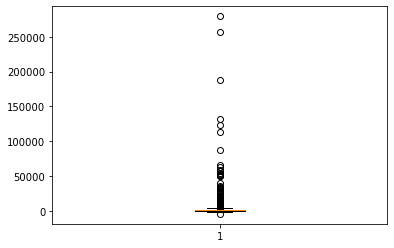

In [27]:
plt.boxplot(RFM['Amount'])


In [28]:
Q1 = RFM['Amount'].quantile(0.25)
Q3 = RFM['Amount'].quantile(0.75)


In [29]:
IQR = Q3 - Q1
IQR

1318.3624999999993

In [30]:
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [31]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa62f0ada0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa62f19438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa62f0aa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa62f19b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa62f19eb8>],
 'means': []}

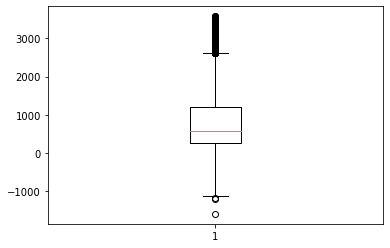

In [32]:
plt.boxplot(RFM['Amount'])

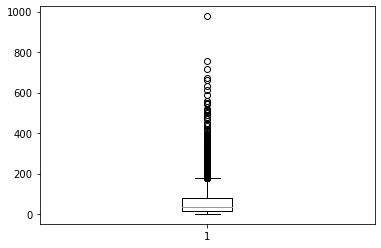

In [33]:
plt.boxplot(RFM['Frequency'])
Q1 = RFM['Frequency'].quantile(0.25)
Q3 = RFM['Frequency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Frequency'] >= Q1 - 1.5*IQR) & (RFM['Frequency'] <= Q3 + 1.5*IQR)]

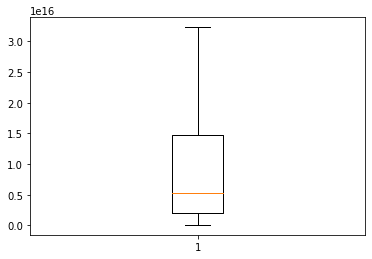

In [34]:
plt.boxplot(RFM['Recency'])
Q1 = RFM['Recency'].quantile(0.25)
Q3 = RFM['Recency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Recency'] >= Q1 - 1.5*IQR) & (RFM['Recency'] <= Q3 + 1.5*IQR)]

In [35]:
RFM.describe(percentiles=[0.02,0.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

,CustomerID,Frequency,Amount,Recency
count,3697.000000,3697.000000,3697.000000,3697
mean,15307.517176,46.658101,771.363098,104 days 19:06:29.797132
std,1717.432301,41.705211,740.646223,103 days 19:11:58.000039
min,12346.000000,1.000000,-1592.490000,1 days 00:00:00
2%,12456.920000,1.000000,38.044000,2 days 18:12:26.400000
5%,12623.800000,3.000000,91.840000,4 days 03:19:48
10%,12922.600000,6.000000,131.924000,9 days 00:36:36
20%,13517.200000,12.000000,206.082000,18 days 03:07:12
30%,14116.800000,18.000000,298.088000,29 days 17:00:12
40%,14731.400000,24.000000,380.152000,44 days 01:52:48


In [36]:
RFM.head(20)

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00
6,12353.0,4,89.00,204 days 19:03:00
7,12354.0,58,1079.40,232 days 23:39:00
8,12355.0,13,459.40,214 days 23:01:00
9,12356.0,59,2811.43,23 days 04:10:00
11,12358.0,19,1168.06,2 days 02:24:00


### Scaling the RFM data

In [37]:
RFM_norm1 = RFM.drop('CustomerID',axis=1)
RFM_norm1.head()

,Frequency,Amount,Recency
0,2,0.00,326 days 02:33:00
2,31,1797.24,75 days 23:37:00
3,73,1757.55,19 days 02:59:00
4,17,334.40,310 days 20:49:00
5,95,1545.41,36 days 22:13:00


In [38]:
RFM_norm1['Recency'] = RFM_norm1['Recency'].dt.days

In [39]:
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [40]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


In [41]:
RFM_norm1.shape

(3697, 3)

In [42]:
#from pyclustertend import hopkins,vat,ivat

In [43]:
#help(hopkins)

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [44]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(df):
    d = df.shape[1]
    n = len(df)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(df.values)
    
    rand_df = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    
    for j in range(0,m):
        u_dist,_ = nbrs.kneighbors(uniform(np.amin(df,axis=0),np.amax(df,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist,_ = nbrs.kneighbors(df.iloc[rand_df[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd)/(sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd,wjd)
        H = 0
    return H

In [45]:
hopkins(RFM_norm1)

0.8855309723829083

## K-Means with some K

In [46]:
model_clus5 = KMeans(n_clusters=5,max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=5)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [47]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

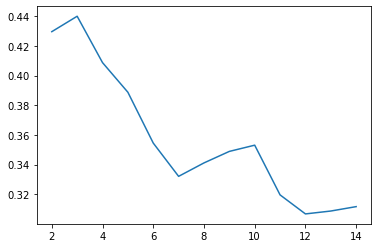

In [48]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of Squared Distance

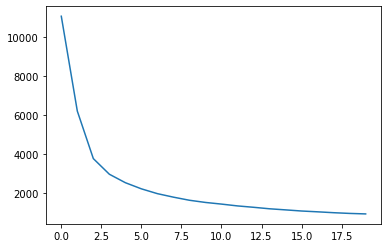

In [49]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters,max_iter = 50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)

In [50]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM,pd.Series(model_clus5.labels_)],axis=1)
RFM_km.columns = ['CustomerID','Frequency','Amount','Recency','ClusterID']

RFM_km['Recency'] = RFM_km['Recency'].dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [51]:
df = pd.concat([pd.Series([0,1,2,3,4]),km_clusters_amount,km_clusters_frequency,km_clusters_recency],axis=1)
df.columns = ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,358.104633,23.355215,57.514953
1,1,2471.402482,117.888283,38.198910
2,2,327.037096,20.558856,262.393839
3,3,1202.896078,53.698389,50.213763
4,4,912.557139,114.021798,53.980926


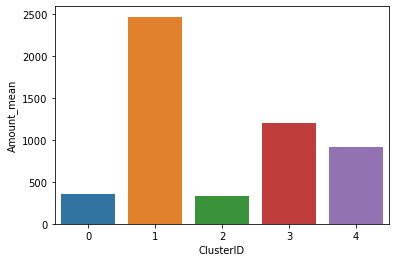

In [52]:
sns.barplot(df['ClusterID'],df['Amount_mean'])

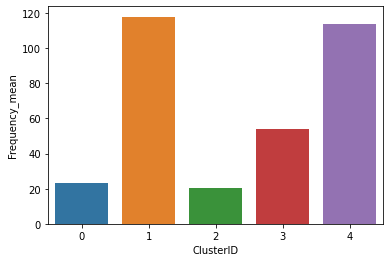

In [53]:
sns.barplot(df['ClusterID'],df['Frequency_mean'])

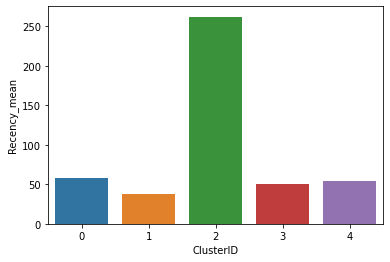

In [54]:
sns.barplot(df['ClusterID'],df['Recency_mean'])

# Hierarchical Clustering

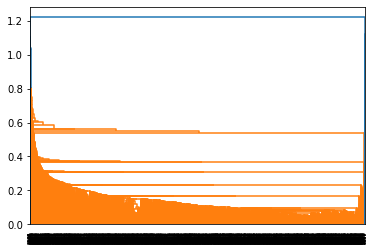

In [55]:
merging = linkage(RFM_norm1,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

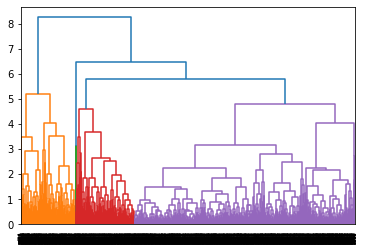

In [56]:
merging = linkage(RFM_norm1,method='complete',metric='euclidean')
dendrogram(merging)
plt.show()

In [57]:
clusterCut = pd.Series(cut_tree(merging,n_clusters=5).reshape(-1,))
RFM_hc = pd.concat([RFM,clusterCut],axis=1)
RFM_hc.columns = ['CustomerID','Frequency','Amount','Recency','ClusterID']

In [60]:
RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_hc.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_hc.groupby(['ClusterID']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_hc.groupby(['ClusterID']).Recency.mean())

In [61]:
RFM_hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3697 non-null   float64
 1   Frequency   3697 non-null   int64  
 2   Amount      3697 non-null   float64
 3   Recency     3697 non-null   int64  
 4   ClusterID   3697 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 130.1 KB


In [62]:
df = pd.concat([pd.Series([0,1,2,3,4]),km_clusters_amount,km_clusters_frequency,km_clusters_recency],axis=1)

In [63]:
df.columns = ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,401.831170,23.929069,131.066011
1,1,1787.153319,44.943966,38.547414
2,2,2324.569366,122.145889,34.856764
3,3,915.359751,89.739875,65.752336
4,4,-997.147143,6.142857,218.285714


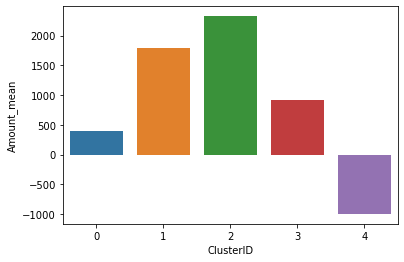

In [64]:
sns.barplot(df['ClusterID'],df['Amount_mean'])

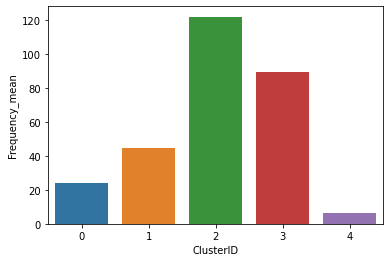

In [65]:
sns.barplot(df['ClusterID'],df['Frequency_mean'])

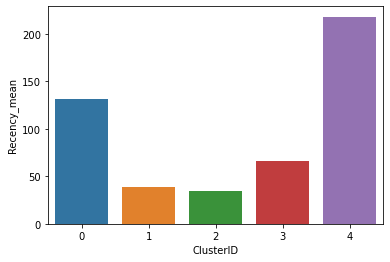

In [66]:
sns.barplot(df['ClusterID'],df['Recency_mean'])